# CVAI Übung: Convolution


### libraries

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import cv2 as cv

path = '/exchange/cvai/images/'

## read greylevel image

(1264, 1741)


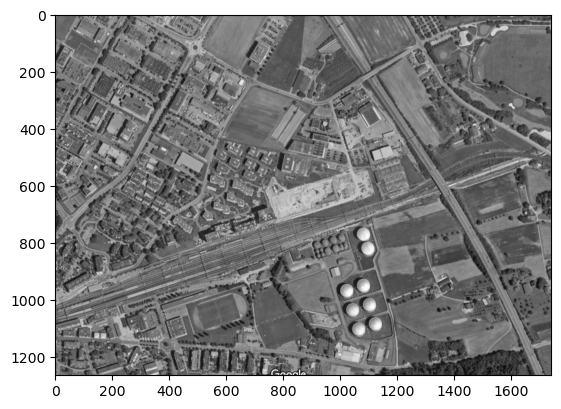

In [2]:
img = cv.cvtColor (cv.imread (path + 'air_image.png'), cv.COLOR_BGR2GRAY)
print (img.shape)
pl.imshow (img, cmap = 'gray')

## read pattern to recognize

(111, 93)


libpng warning: iCCP: profile 'ICC profile': 'GRAY': Gray color space not permitted on RGB PNG


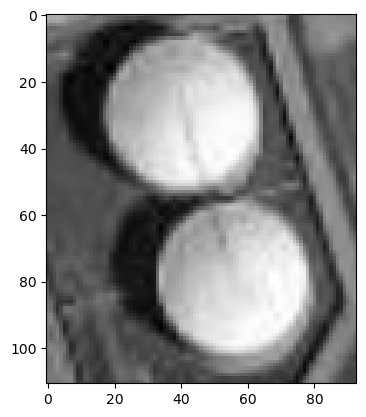

In [3]:
mask = cv.cvtColor (cv.imread (path + 'air_mask.png'), cv.COLOR_BGR2GRAY)
print (mask.shape)
pl.imshow (mask, cmap = 'gray')

## Exercise 1

Try to localize mask in image using correlation.

In [4]:
# Get dimensions
img_h, img_w = img.shape
mask_h, mask_w = mask.shape

# Pre-compute the mask's mean and standard deviation for normalization
mask_mean = mask.mean()
mask_std = mask.std()

# Prepare an output array to store correlation values
result = np.zeros((img_h - mask_h + 1, img_w - mask_w + 1), dtype=np.float32)

# Slide the mask over every possible location in the image
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        # Extract the region of interest from the image
        sub_img = img[i:i+mask_h, j:j+mask_w]
        sub_mean = sub_img.mean()
        sub_std = sub_img.std()
        
        # Avoid division by zero in flat regions
        if sub_std == 0 or mask_std == 0:
            result[i, j] = 0
        else:
            # Compute normalized cross-correlation:
            # numerator: sum((sub_img - mean_sub_img) * (mask - mask_mean))
            # denominator: (std(sub_img) * std(mask) * (mask height * mask width))
            numerator = np.sum((sub_img - sub_mean) * (mask - mask_mean))
            denominator = mask_std * sub_std * mask_h * mask_w
            result[i, j] = numerator / denominator

In [5]:
max_loc = np.unravel_index(np.argmax(result), result.shape)
print("Mask found at location (row, column):", max_loc)

Mask found at location (row, column): (np.int64(741), np.int64(1042))


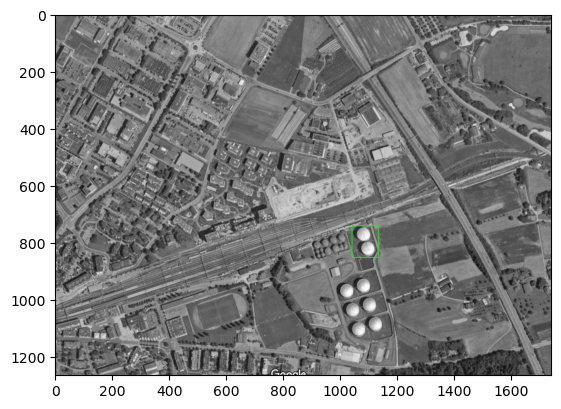

In [9]:
top_left = (max_loc[1], max_loc[0])  # convert (row, column) to (x, y)
bottom_right = (top_left[0] + mask_w, top_left[1] + mask_h)
image_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
cv.rectangle(image_color, top_left, bottom_right, (0, 255, 0), 2)

pl.imshow(image_color)

As result you will localize the mask in the near of the right position, but not exactly.
Please think about the reason for this fail.

## Exercise 2

Try some operators for edge detection. Apply these operators to the image before repeating 
exercise 1 with thee preprocessed images. Is the result better now? Think about the reasons.

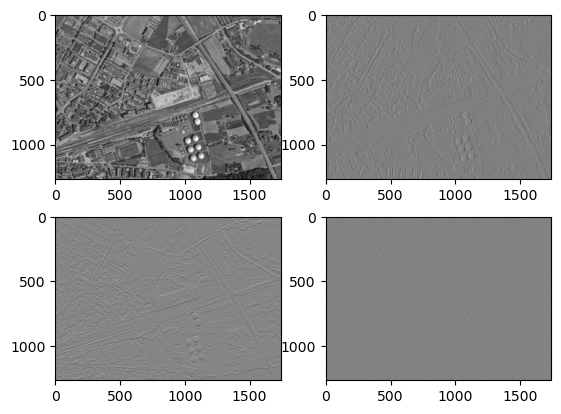

In [15]:
blur = cv.GaussianBlur(img, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv.Sobel(src=blur, ddepth=cv.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv.Sobel(src=blur, ddepth=cv.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv.Sobel(src=blur, ddepth=cv.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

pl.subplot (2, 2, 1); pl.imshow (blur, cmap = 'gray')
pl.subplot (2, 2, 2); pl.imshow (sobelx, cmap = 'gray')
pl.subplot (2, 2, 3); pl.imshow (sobely, cmap = 'gray')
pl.subplot (2, 2, 4); pl.imshow (sobelxy, cmap = 'gray')

In [16]:
mask_blur = cv.GaussianBlur(mask, (3,3), 0) 
mask_edges = cv.Sobel(src=mask, ddepth=cv.CV_64F, dx=1, dy=1, ksize=5)

In [17]:
# Get dimensions
img_h, img_w = sobelxy.shape
mask_h, mask_w = mask_edges.shape

# Pre-compute the mask's mean and standard deviation for normalization
mask_mean = mask_edges.mean()
mask_std = mask_edges.std()

# Prepare an output array to store correlation values
result = np.zeros((img_h - mask_h + 1, img_w - mask_w + 1), dtype=np.float32)

# Slide the mask over every possible location in the image
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        # Extract the region of interest from the image
        sub_img = sobelxy[i:i+mask_h, j:j+mask_w]
        sub_mean = sub_img.mean()
        sub_std = sub_img.std()
        
        # Avoid division by zero in flat regions
        if sub_std == 0 or mask_std == 0:
            result[i, j] = 0
        else:
            # Compute normalized cross-correlation:
            # numerator: sum((sub_img - mean_sub_img) * (mask - mask_mean))
            # denominator: (std(sub_img) * std(mask) * (mask height * mask width))
            numerator = np.sum((sub_img - sub_mean) * (mask - mask_mean))
            denominator = mask_std * sub_std * mask_h * mask_w
            result[i, j] = numerator / denominator

In [18]:
max_loc = np.unravel_index(np.argmax(result), result.shape)
print("Mask found at location (row, column):", max_loc)

Mask found at location (row, column): (np.int64(745), np.int64(1044))


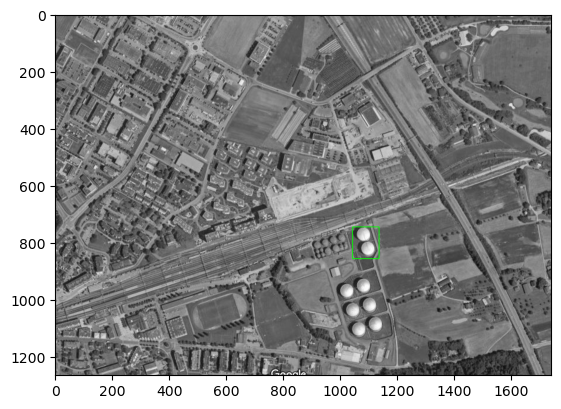

In [19]:
top_left = (max_loc[1], max_loc[0])  # convert (row, column) to (x, y)
bottom_right = (top_left[0] + mask_w, top_left[1] + mask_h)
image_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
cv.rectangle(image_color, top_left, bottom_right, (0, 255, 0), 2)

pl.imshow(image_color)